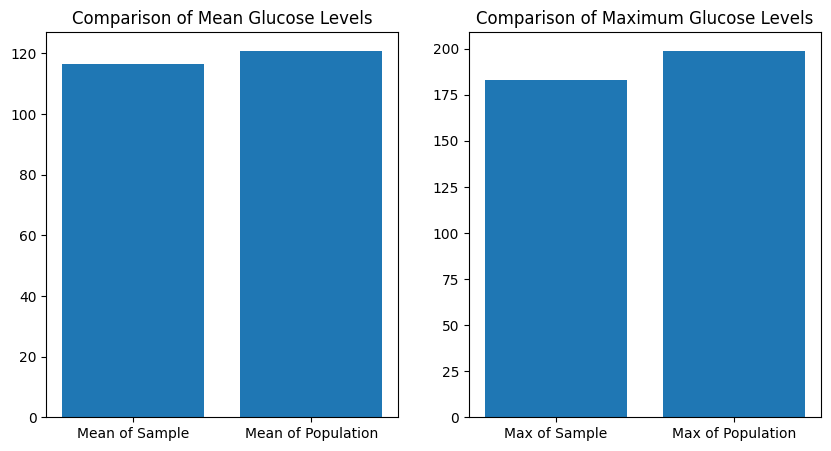

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the diabetes dataset
diabetes_data = pd.read_csv('diabetes.csv')

# a) Drawing a random sample of 25 records
np.random.seed(42)  # Ensuring reproducibility
random_sample = diabetes_data.sample(n=25)
mean_glucose_sample = random_sample['Glucose'].mean()
max_glucose_sample = random_sample['Glucose'].max()
mean_glucose_population = diabetes_data['Glucose'].mean()
max_glucose_population = diabetes_data['Glucose'].max()

# Plot for Mean and Max Glucose levels comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['Mean of Sample', 'Mean of Population'], [mean_glucose_sample, mean_glucose_population])
plt.title('Comparison of Mean Glucose Levels')
plt.subplot(1, 2, 2)
plt.bar(['Max of Sample', 'Max of Population'], [max_glucose_sample, max_glucose_population])
plt.title('Comparison of Maximum Glucose Levels')
plt.show()

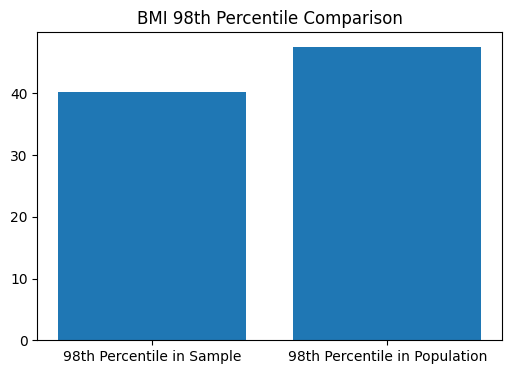

In [ ]:
# b) Computing the 98th percentile of BMI in both sample and population
percentile_98_sample = np.percentile(random_sample['BMI'], 98)
percentile_98_population = np.percentile(diabetes_data['BMI'], 98)

# Bar plot for 98th percentile BMI comparison
plt.figure(figsize=(6, 4))
plt.bar(['98th Percentile in Sample', '98th Percentile in Population'], [percentile_98_sample, percentile_98_population])
plt.title('BMI 98th Percentile Comparison')
plt.show()

In [ ]:
# c) Bootstrap analysis for Blood Pressure
mean_bps = []
std_dev_bps = []
percentile_95_bps = []

for i in range(500):
    bs_sample = diabetes_data.sample(n=150, replace=True)
    mean_bps.append(bs_sample['BloodPressure'].mean())
    std_dev_bps.append(bs_sample['BloodPressure'].std())
    percentile_95_bps.append(np.percentile(bs_sample['BloodPressure'], 95))

# Population statistics for Blood Pressure
mean_bp_population = diabetes_data['BloodPressure'].mean()
std_bp_population = diabetes_data['BloodPressure'].std()
percentile_95_population = np.percentile(diabetes_data['BloodPressure'], 95)

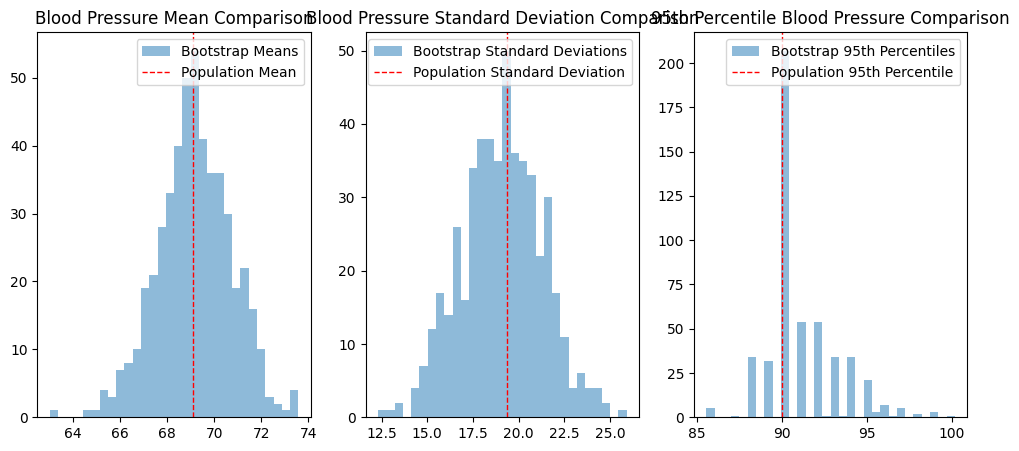

In [ ]:
# Visualization of bootstrap results and population statistics
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.hist(mean_bps, bins=30, alpha=0.5, label='Bootstrap Means')
plt.axvline(mean_bp_population, color='red', linestyle='dashed', linewidth=1, label='Population Mean')
plt.title('Blood Pressure Mean Comparison')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(std_dev_bps, bins=30, alpha=0.5, label='Bootstrap Standard Deviations')
plt.axvline(std_bp_population, color='red', linestyle='dashed', linewidth=1, label='Population Standard Deviation')
plt.title('Blood Pressure Standard Deviation Comparison')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(percentile_95_bps, bins=30, alpha=0.5, label='Bootstrap 95th Percentiles')
plt.axvline(percentile_95_population, color='red', linestyle='dashed', linewidth=1, label='Population 95th Percentile')
plt.title('95th Percentile Blood Pressure Comparison')
plt.legend()

plt.show()